## Checking the distribution for normality

AK

This task is quite common in many applications, including those in the financial sector


This code will generate random data from a normal distribution, perform Anderson-Darling, Shapiro-Wilk, and Kolmogorov-Smirnov tests for normality, and display the test results along with Q-Q plots and bell curves for each test. The conclusion on whether the data is normal or not is based on the specified significance level (`alpha`) for each test.


In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def perform_normality_tests(data, alpha=0.05, tests=['anderson', 'shapiro', 'kstest']):
    """
    Perform normality tests on a given data using Anderson-Darling, Shapiro-Wilk, and Kolmogorov-Smirnov tests.
    
    Parameters:
    -----------
    data: array-like
        The data to be tested for normality.
    alpha: float, optional (default=0.05)
        The significance level for the tests.
    tests: list, optional (default=['anderson', 'shapiro', 'kstest'])
        The normality tests to be performed. Supported options are 'anderson', 'shapiro', and 'kstest'.
    
    Returns:
    --------
    dict
        A dictionary containing the results of the specified normality tests.
    """
    # Initialize results dictionary
    test_results = {}
    
    # Anderson-Darling test
    if 'anderson' in tests:
        result_anderson = stats.anderson(data)
        test_results['anderson'] = {
            'test_statistic': result_anderson.statistic,
            'critical_values': result_anderson.critical_values,
            'is_normal': result_anderson.statistic < result_anderson.critical_values[2]  # Using the 5% significance level
        }
        
        # Q-Q plot for Anderson-Darling test
        stats.probplot(data, dist='norm', plot=plt)
        plt.title('Q-Q Plot (Anderson-Darling)')
        plt.show()
        
        # Bell curve
        plt.hist(data, density=True, alpha=0.6, color='b')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, np.mean(data), np.std(data))
        plt.plot(x, p, 'k', linewidth=2)
        plt.title('Bell Curve')
        plt.show()
    
    # Shapiro-Wilk test
    if 'shapiro' in tests:
        result_shapiro = stats.shapiro(data)
        test_results['shapiro'] = {
            'test_statistic': result_shapiro.statistic,
            'p_value': result_shapiro.pvalue,
            'is_normal': result_shapiro.pvalue > alpha
        }
        
        # Q-Q plot for Shapiro-Wilk test
        stats.probplot(data, dist='norm', plot=plt)
        plt.title('Q-Q Plot (Shapiro-Wilk)')
        plt.show()
        
        # Bell curve
        plt.hist(data, density=True, alpha=0.6, color='b')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, np.mean(data), np.std(data))
        plt.plot(x, p, 'k', linewidth=2)
        plt.title('Bell Curve')
        plt.show()
    
    # Kolmogorov-Smirnov test
    if 'kstest' in tests:
        result_kstest = stats.kstest(data, 'norm')
        test_results['kstest'] = {
            'test_statistic': result_kstest.statistic,
            'p_value': result_kstest.pvalue,
            'is_normal': result_kstest.pvalue > alpha
        }
        
        # Q-Q plot for Kolmogorov-Smirnov test
        stats.probplot(data, dist='norm', plot=plt)
        plt.title('Q-Q Plot (Kolmogorov-Smirnov)')
        plt.show()

    # Bell curve
    plt.hist(data, density=True, alpha=0.6, color='b')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(data), np.std(data))
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Bell Curve')
    plt.show()

    return test_results

Example

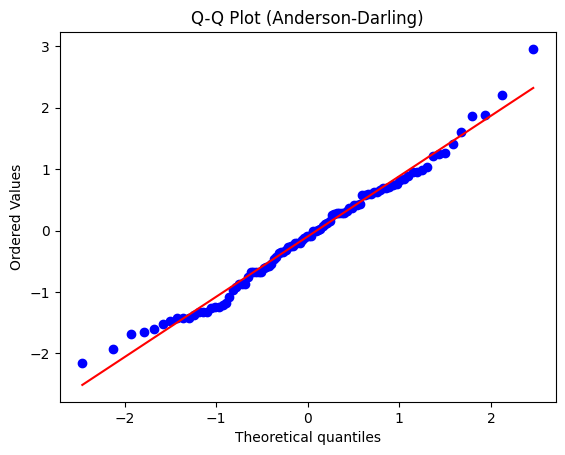

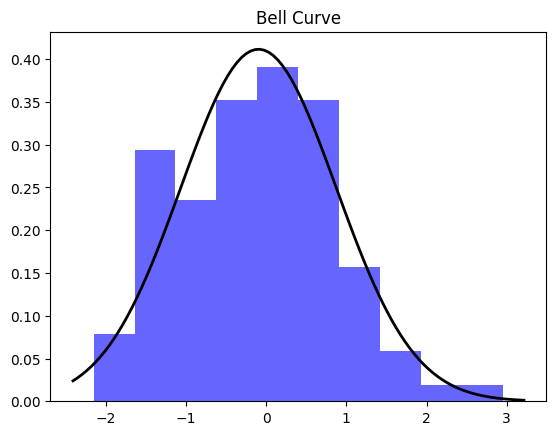

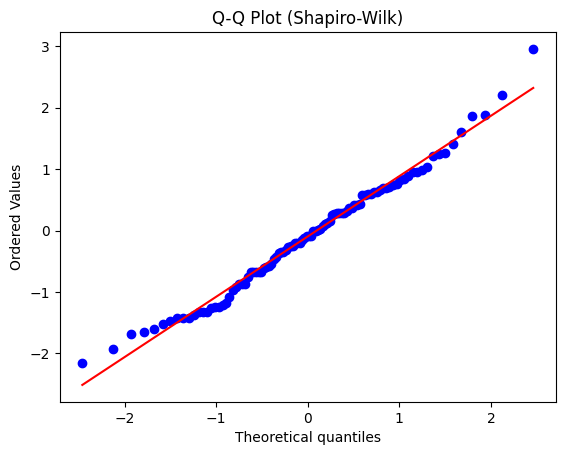

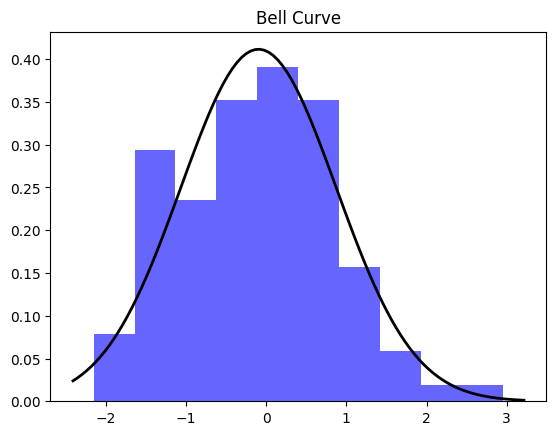

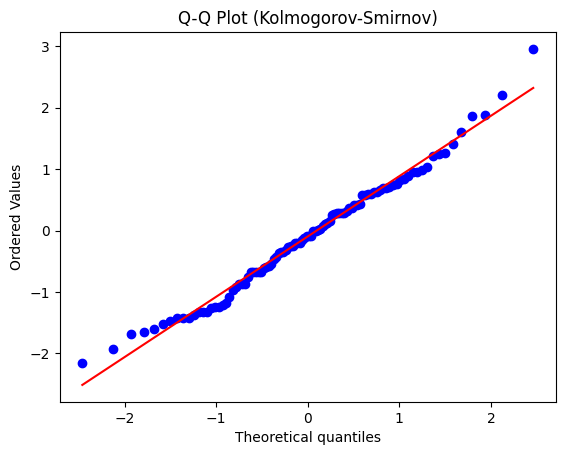

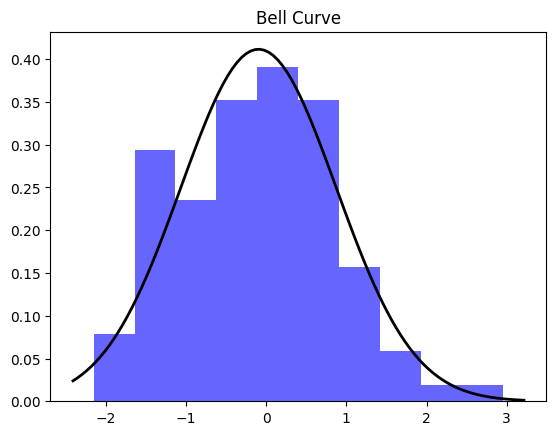

In [12]:
data = np.random.normal(loc=0, scale=1, size=100) # Generate random data from a normal distribution
test_results = perform_normality_tests(data, alpha=0.05, tests=['anderson', 'shapiro', 'kstest'])

In [13]:
# Print test results
print("Anderson-Darling Test:")
print(f"Test Statistic: {test_results['anderson']['test_statistic']}")
print(f"Critical Values: {test_results['anderson']['critical_values']}")
print(f"Is Normal: {test_results['anderson']['is_normal']}")
print("\n")
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {test_results['shapiro']['test_statistic']}")
print(f"P-value: {test_results['shapiro']['p_value']}")
print(f"Is Normal: {test_results['shapiro']['is_normal']}")
print("\n")
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {test_results['kstest']['test_statistic']}")
print(f"P-value: {test_results['kstest']['p_value']}")
print(f"Is Normal: {test_results['kstest']['is_normal']}")

Anderson-Darling Test:
Test Statistic: 0.30833923836223676
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Is Normal: True


Shapiro-Wilk Test:
Test Statistic: 0.9861087799072266
P-value: 0.38053303956985474
Is Normal: True


Kolmogorov-Smirnov Test:
Test Statistic: 0.07185824454849943
P-value: 0.6533042914722607
Is Normal: True
